<a href="https://www.kaggle.com/code/quratulain20/dimensionality-reduction-pca?scriptVersionId=196335612" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/heart.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace =True)

In [9]:
df.shape

(302, 14)

### STEPS:

> Our aim is to perform dimensionality reduction by performing feature extraction rather than performing feature selection.

1. Standardization 
2. Apply PCA algorithm


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
scaler =scaler.fit(df)

In [12]:
scaled = scaler.transform(df)

In [13]:
scaled

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -0.71491124,
        -2.1479552 ,  0.91731315],
       [-1.92854796,  0.68265615,  1.005911  , ..., -0.71491124,
        -0.51399432,  0.91731315],
       [-1.48572607, -1.46486632,  0.0353515 , ..., -0.71491124,
        -0.51399432,  0.91731315],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ...,  1.27497996,
         1.11996657, -1.09014026],
       [ 0.28556146,  0.68265615, -0.93520799, ...,  0.28003436,
         1.11996657, -1.09014026],
       [ 0.28556146, -1.46486632,  0.0353515 , ...,  0.28003436,
        -0.51399432, -1.09014026]])

In [14]:
# Applying PCA
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
data_pca = pca.fit_transform(scaled)

In [17]:
data_pca.shape

(302, 2)

In [18]:
pca.explained_variance_

array([3.32055319, 1.58198887])

Text(0, 0.5, 'PC2')

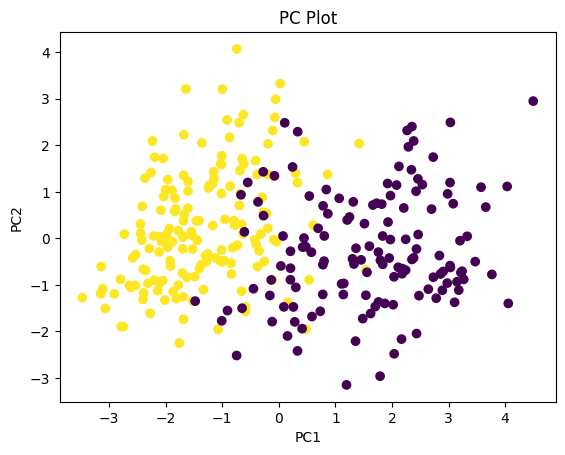

In [19]:
plt.scatter(data_pca[:,0],data_pca[:,1], c=df['target'], marker='o')

# Adding titles and labels
plt.title('PC Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')